# ORIE 4580/5580/5581 Assignment 3

#### Students: Soul Oyekunle (sgo9)

### Github link: [example Github link](https://github.com/sulaimanoyekunle/ORIE-4580)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [2]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)
# New Section
In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

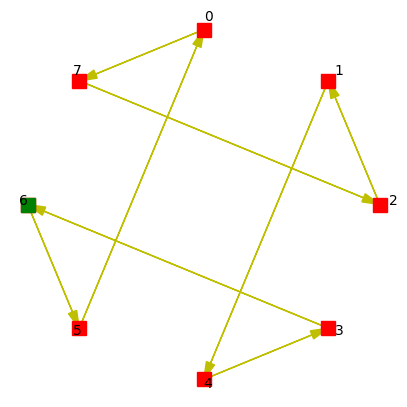

In [6]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m = 2**31-1, a = 1103515245, c = 12345, seed = 1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value for the LCG.
    a (int): The multiplier value for the LCG.
    c (int): The increment value for the LCG.
    seed (int): The initial seed value for the LCG.

    Returns:
    numpy.ndarray: An array of pseudorandom numbers.
    """
    x = np.zeros(n, dtype=int)
    x[0] = seed
    for i in range(n - 1):
        x[i+1] = (a * x[i] + c) % m
    return x

# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

m = 8
a = 5
c = 3
seed = 7

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

In [7]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m = 2**31-1, a = 1103515245, c = 12345, seed = 1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value for the LCG.
    a (int): The multiplier value for the LCG.
    c (int): The increment value for the LCG.
    seed (int): The initial seed value for the LCG.

    Returns:
    numpy.ndarray: An array of pseudorandom numbers.
    """
    x = np.zeros(n, dtype=int)
    x[0] = seed
    for i in range(n - 1):
        x[i+1] = (a * x[i] + c) % m
    return x

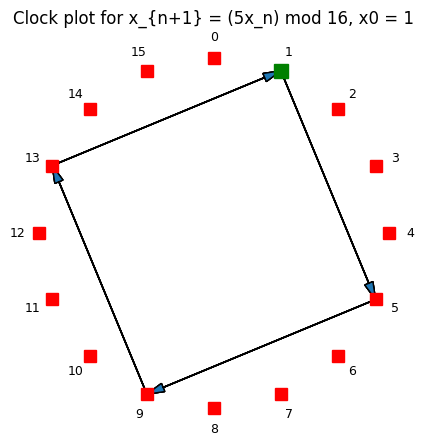

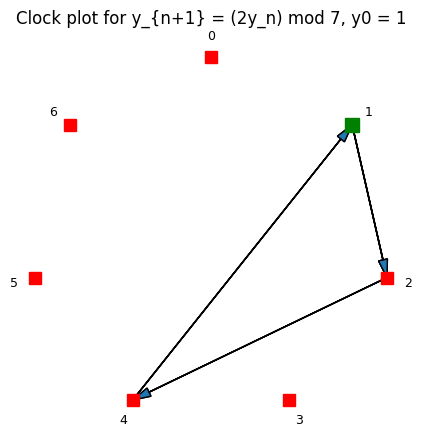

In [8]:
# --- Robust clock visualization (no polar axes; safe titles) ---

import numpy as np
import matplotlib.pyplot as plt

def multiplicative_lcg_states(m, a, seed=1, steps=None):
    """
    Generate raw LCG states (not normalized) for the multiplicative LCG:
        x_{n+1} = (a * x_n) mod m
    """
    if steps is None:
        steps = m + 1
    states = np.empty(steps, dtype=int)
    x = seed
    for i in range(steps):
        states[i] = x
        x = (a * x) % m
    return states

def _state_to_xy(s, m):
    theta = 2.0 * np.pi * ((s % m) / m)
    return np.sin(theta), np.cos(theta)

def plot_clock_cartesian(m, states, title=None, annotate_ticks=True):
    """
    Draw a clock-face for modulus m and overlay the path through given states.
    Uses Cartesian axes (no polar transform), so annotations are safe.
    """
    fig = plt.figure(figsize=(5,5))
    ax = plt.gca()

    # Tick marks (red squares) for residues 0..m-1
    thetas = 2.0 * np.pi * (np.arange(m) / m)
    xs = np.sin(thetas)
    ys = np.cos(thetas)
    ax.plot(xs, ys, 'rs', markersize=8)

    # Optional residue labels
    if annotate_ticks:
        for i, (xi, yi) in enumerate(zip(xs, ys)):
            ax.text(1.12*xi, 1.12*yi, str(i), ha='center', va='center', fontsize=9)

    # Highlight the seed (green square)
    x0, y0 = _state_to_xy(states[0], m)
    ax.plot(x0, y0, 'gs', markersize=10)

    # Path arrows through the states
    for i in range(len(states)-1):
        x_start, y_start = _state_to_xy(states[i],   m)
        x_end,   y_end   = _state_to_xy(states[i+1], m)
        ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                 length_includes_head=True, head_width=0.05, head_length=0.10)

    ax.set_aspect('equal', 'box')
    ax.axis('off')
    if title:
        ax.set_title(title, pad=12)
    plt.show()


# --- Part (a) calls (titles use plain text "mod" to avoid mathtext errors) ---

# x_{n+1} = (5 x_n) mod 16, x0 = 1
states_x = multiplicative_lcg_states(m=16, a=5, seed=1, steps=17)
plot_clock_cartesian(
    m=16,
    states=states_x,
    title="Clock plot for x_{n+1} = (5x_n) mod 16, x0 = 1",
    annotate_ticks=True
)

# y_{n+1} = (2 y_n) mod 7, y0 = 1
states_y = multiplicative_lcg_states(m=7, a=2, seed=1, steps=8)
plot_clock_cartesian(
    m=7,
    states=states_y,
    title="Clock plot for y_{n+1} = (2y_n) mod 7, y0 = 1",
    annotate_ticks=True
)


<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

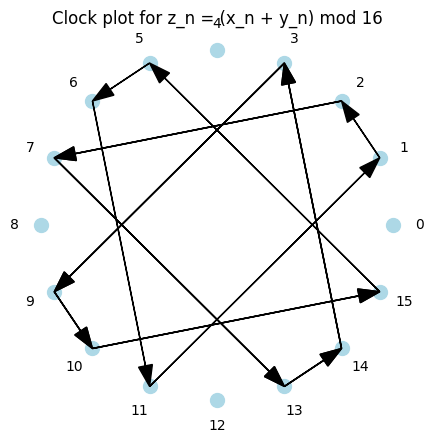

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def lcg_sequence(a, m, seed, n_terms):
    """Generate n_terms from an LCG: x_{n+1} = (a * x_n) mod m."""
    seq = [seed]
    for _ in range(n_terms - 1):
        seq.append((a * seq[-1]) % m)
    return seq

def clock_visualization(seq, m, title="LCG Clock Plot"):
    """
    Visualize a sequence on a clock with m states.
    - seq: the generated sequence
    - m: modulus
    - title: plot title
    """
    # Circle points for states 0,...,m-1
    theta = np.linspace(0, 2*np.pi, m, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)

    plt.figure(figsize=(5,5))
    plt.scatter(x, y, c='lightblue', s=100, zorder=1)  # states as nodes

    # Label each state
    for i in range(m):
        plt.text(1.15*x[i], 1.15*y[i], str(i), ha='center', va='center')

    # Draw arrows for transitions in the sequence
    for i in range(len(seq)-1):
        start, end = seq[i], seq[i+1]
        plt.arrow(x[start], y[start],
                  x[end] - x[start], y[end] - y[start],
                  head_width=0.08, length_includes_head=True,
                  color="black", zorder=2)

    plt.title(title)
    plt.axis("off")
    plt.show()

    # Base sequences
x_seq = lcg_sequence(a=5, m=16, seed=1, n_terms=20)
y_seq = lcg_sequence(a=2, m=7, seed=1, n_terms=20)

# Combined sequence
z_seq = [(x_seq[i] + y_seq[i]) % 16 for i in range(len(x_seq))]

# Clock visualization
clock_visualization(z_seq, m=16, title="Clock plot for z_n = (x_n + y_n) mod 16")



___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

$
\begin{aligned}
x_{n+1} &= (5x_n) \bmod 16, \quad x_0 = 1 \\[6pt]
&\Rightarrow x_0 = 1,\; x_1 = 5,\; x_2 = 9,\; x_3 = 13,\; x_4 = 1 \\[6pt]
&\Rightarrow \text{Period}(x_n) = 4
\end{aligned}
$

$
\begin{aligned}
y_{n+1} &= (2y_n) \bmod 7, \quad y_0 = 1 \\[6pt]
&\Rightarrow y_0 = 1,\; y_1 = 2,\; y_2 = 4,\; y_3 = 1 \\[6pt]
&\Rightarrow \text{Period}(y_n) = 3
\end{aligned}
$

$
\begin{aligned}
z_n &= (x_n + y_n) \bmod 16 \\[6pt]
&\text{Since } \text{Period}(x_n)=4 \text{ and } \text{Period}(y_n)=3, \\[6pt]
&\text{the combined generator repeats every } \mathrm 4*3=12 \text{ steps.} \\[6pt]
&\Rightarrow \text{Period}(z_n) = 12
\end{aligned}
$

$
\boxed{\text{Period}(x_n) = 4,\quad \text{Period}(y_n) = 3,\quad \text{Period}(z_n) = 12}
$



___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

\[
F^{-1}(y)=
\begin{cases}
0, & y=0,\\[6pt]
y, & 0<y<\tfrac{1}{2},\\[6pt]
\tfrac{1}{2}, & y=\tfrac{1}{2},\\[6pt]
1, & \tfrac{1}{2}<y\le 1.
\end{cases}
\]


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

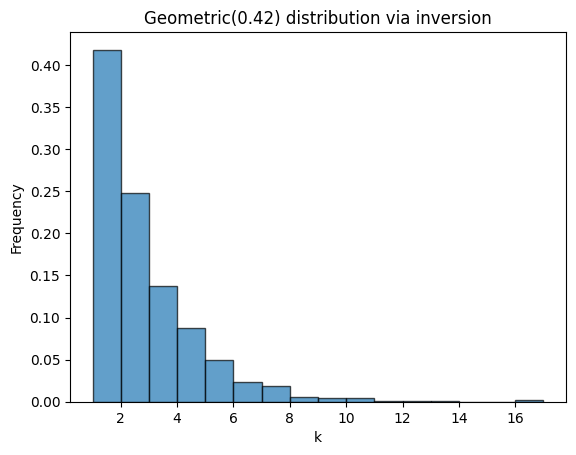

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_inverse_transform(p, n_samples=1000):
    # Step 1: Generate uniform(0,1) samples
    U = np.random.rand(n_samples)
    # Step 2: Apply inversion formula
    X = np.ceil(np.log(1 - U) / np.log(1 - p)).astype(int)
    return X

# Parameters
p = 0.42
n_samples = 1000

# Generate samples
samples = geometric_inverse_transform(p, n_samples)

# Plot histogram
plt.hist(samples, bins=range(1, max(samples)+2), density=True, edgecolor="black", alpha=0.7)
plt.xlabel("k")
plt.ylabel("Frequency")
plt.title(f"Geometric({p}) distribution via inversion")
plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

___

### Ans.
We first normalize the density
$
f(x)=
\begin{cases}
\dfrac{e^{x}}{Z}, & 0 \le x \le 2, \\[8pt]
\dfrac{e^{-x}}{Z}, & x > 2, \\[8pt]
0, & \text{otherwise},
\end{cases}
\qquad
Z \;=\; \int_{0}^{2} e^{t}\,dt \;+\; \int_{2}^{\infty} e^{-t}\,dt
\;=\; (e^{2}-1)+e^{-2}.
$

The corresponding cdf is
$
F(x)=
\begin{cases}
0, & x<0, \\[8pt]
\dfrac{e^{x}-1}{Z}, & 0 \le x \le 2, \\[12pt]
\dfrac{e^{2}-1}{Z} + \dfrac{e^{-2}-e^{-x}}{Z}, & x \ge 2.
\end{cases}
$

Let
$
\alpha = F(2^{-}) = \frac{e^{2}-1}{Z}.
$

To generate a random variable $X$ with density $f$, draw $U \sim \mathrm{Unif}(0,1)$ and set
$
X =
\begin{cases}
\ln\!\big(1 + ZU\big), & U \le \alpha, \\[10pt]
-\ln\!\Big(e^{-2} - Z\big(U - \alpha\big)\Big), & U > \alpha.
\end{cases}
$

This defines the inversion algorithm for $X$.

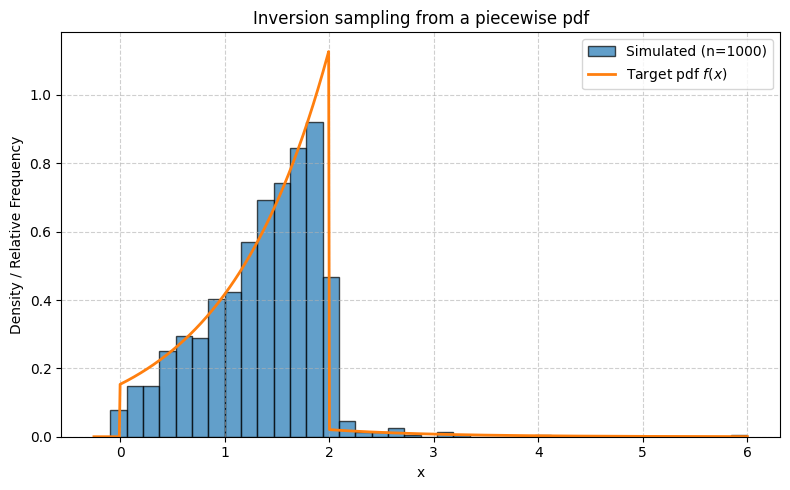

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizing constant
Z = (np.e**2 - 1.0) + np.e**(-2.0)
alpha = (np.e**2 - 1.0) / Z  # F(2-)

def pdf_piecewise(x):
    """Normalized pdf f(x). Vectorized for numpy arrays."""
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (x >= 0) & (x <= 2)
    mask2 = (x > 2)
    out[mask1] = np.exp(x[mask1]) / Z
    out[mask2] = np.exp(-x[mask2]) / Z
    return out

def rvs_piecewise(n, rng=None):
    """Inversion sampler for the piecewise pdf described above."""
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(n)
    x = np.empty(n, dtype=float)
    left = U <= alpha
    right = ~left
    # Left branch: U = (e^x - 1)/Z  -> x = ln(1 + ZU)
    x[left] = np.log1p(Z * U[left])  # log1p for numerical stability
    # Right branch: U = alpha + (e^{-2} - e^{-x})/Z -> e^{-x} = e^{-2} - Z(U-alpha)
    x[right] = -np.log(np.exp(-2.0) - Z * (U[right] - alpha))
    return x

# --- Generate and plot ---
n = 1000
rng = np.random.default_rng(123)
samples = rvs_piecewise(n, rng=rng)

# Histogram (probability-scaled)
xmin, xmax = -0.25, 6.0
xs = np.linspace(xmin, xmax, 800)
fx = pdf_piecewise(xs)

plt.figure(figsize=(8,5))
plt.hist(samples, bins=40, range=(xmin, xmax), density=True, alpha=0.7, edgecolor='black',
         label=f"Simulated (n={n})")
plt.plot(xs, fx, linewidth=2, label="Target pdf $f(x)$")
plt.xlabel("x")
plt.ylabel("Density / Relative Frequency")
plt.title("Inversion sampling from a piecewise pdf")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


### Ans.
We want to sample from
$
f(x) \;=\;
\begin{cases}
\dfrac{5x^4 + 4x^3 + 3x^2 + 1}{4}, & 0 \le x \le 1, \\[8pt]
0, & \text{otherwise}.
\end{cases}
$

Step 1: Proposal distribution.  
Take $g(x) = 1$ for $0 \le x \le 1$ (the density of $\mathrm{Unif}(0,1)$).

Step 2: Find $M$.  
Since
$
f'(x) = \tfrac{1}{4}(20x^3 + 12x^2 + 6x) \ge 0 \quad \text{on } [0,1],
$
$f(x)$ is increasing, so its maximum occurs at $x=1$:
$
M = \sup_{0 \le x \le 1} \frac{f(x)}{g(x)} = f(1) = \frac{13}{4}.
$

Step 3: Acceptance probability.  
For any candidate $Y \sim g$,
$
\frac{f(Y)}{M g(Y)} = \frac{f(Y)}{M}
= \frac{5Y^4 + 4Y^3 + 3Y^2 + 1}{13}.
$

Acceptance–Rejection algorithm:

1. Generate $Y \sim \mathrm{Unif}(0,1)$.
2. Generate $U \sim \mathrm{Unif}(0,1)$ independently.
3. If $U \le \dfrac{5Y^4 + 4Y^3 + 3Y^2 + 1}{13}$, accept $X=Y$; otherwise reject and return to step 1.

In [10]:
import numpy as np

def sample_X_ar(n, rng=None):
    """
    Acceptance–Rejection for f(x) = (5x^4 + 4x^3 + 3x^2 + 1)/4 on [0,1].
    Proposal g ~ Uniform(0,1). Envelope M = 13/4. Expected accept rate ~ 4/13.
    """
    if rng is None:
        rng = np.random.default_rng()
    M = 13.0 / 4.0
    out = np.empty(n, dtype=float)
    i = 0
    while i < n:
        y = rng.random()              # Y ~ Uniform(0,1)
        u = rng.random()              # U ~ Uniform(0,1)
        w = (5*y**4 + 4*y**3 + 3*y**2 + 1) / 13.0  # f(y)/M
        if u <= w:
            out[i] = y
            i += 1
    return out


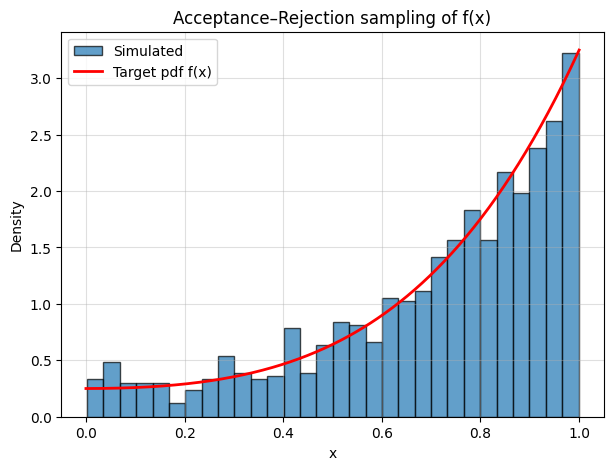

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4.0

def sample_X_ar(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    M = 13.0 / 4.0
    samples = []
    while len(samples) < n:
        y = rng.random()        # proposal ~ U(0,1)
        u = rng.random()
        if u <= f(y) / M:       # accept with prob f(y)/M
            samples.append(y)
    return np.array(samples)

# Generate 1000 samples
rng = np.random.default_rng(123)
samples = sample_X_ar(1000, rng)

# Plot histogram vs target pdf
x = np.linspace(0, 1, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=30, density=True, alpha=0.7, edgecolor="black", label="Simulated")
plt.plot(x, f(x), 'r-', lw=2, label="Target pdf f(x)")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Acceptance–Rejection sampling of f(x)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>


### Ans.
In acceptance--rejection, the probability of accepting a proposal is
$
\Pr(\text{accept}) \;=\; \frac{1}{M} \int_{0}^{1} f(x)\,dx.
$

First compute the integral:
$
\int_{0}^{1} f(x)\,dx
= \int_{0}^{1} \frac{5x^4 + 4x^3 + 3x^2 + 1}{4}\,dx
= \frac{1}{4}\left( \int_0^1 5x^4\,dx + \int_0^1 4x^3\,dx + \int_0^1 3x^2\,dx + \int_0^1 1\,dx \right).
$

Evaluating term by term,
$
\int_0^1 5x^4\,dx = 1, \qquad
\int_0^1 4x^3\,dx = 1, \qquad
\int_0^1 3x^2\,dx = 1, \qquad
\int_0^1 1\,dx = 1.
$

Thus
$
\int_{0}^{1} f(x)\,dx = \frac{1+1+1+1}{4} = 1,
$
so $f(x)$ is already normalized.

Since we chose $M = \sup_{0\le x \le 1} f(x) = f(1) = \tfrac{13}{4}$, the acceptance probability is
$
\Pr(\text{accept}) \;=\; \frac{1}{M} = \frac{4}{13}.
$

Therefore, the expected number of uniform proposals per accepted sample is
$
\mathbb{E}[\text{number of proposals}] \;=\; \frac{1}{\Pr(\text{accept})} \;=\; \frac{13}{4} \;\approx\; 3.25.
$

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Accepted samples: 2500
Attempts (proposals): 8304
Total Uniform(0,1) draws: 16608
Empirical acceptance rate: 0.301 (95% CI: [0.291, 0.311])


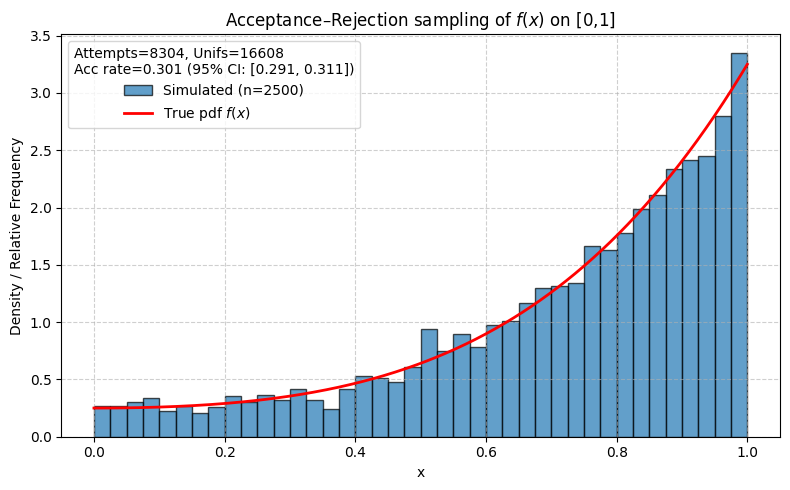

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- target pdf on [0,1] ---
def f_pdf(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (x >= 0) & (x <= 1)
    xm = x[mask]
    out[mask] = (5*xm**4 + 4*xm**3 + 3*xm**2 + 1) / 4.0
    return out

# --- acceptance-rejection sampler with usage accounting ---
def sample_X_ar(n, rng=None):
    """
    Acceptance–Rejection for f(x) = (5x^4 + 4x^3 + 3x^2 + 1)/4 on [0,1].
    Proposal g ~ Uniform(0,1). Envelope M = 13/4.
    Returns: samples, total_uniform_draws, attempts, acceptance_rate
    """
    if rng is None:
        rng = np.random.default_rng()
    M = 13.0 / 4.0

    samples = np.empty(n, dtype=float)
    i = 0
    attempts = 0
    while i < n:
        y = rng.random()      # 1st uniform
        u = rng.random()      # 2nd uniform
        attempts += 1
        # accept with prob f(y)/M
        if u <= ((5*y**4 + 4*y**3 + 3*y**2 + 1) / 13.0):
            samples[i] = y
            i += 1

    total_uniform_draws = 2 * attempts
    acceptance_rate = n / attempts
    return samples, total_uniform_draws, attempts, acceptance_rate

# --- generate 2,500 samples ---
rng = np.random.default_rng(123)
n = 2500
samples, total_unifs, attempts, acc_rate = sample_X_ar(n, rng=rng)

# 95% CI for acceptance rate
se = np.sqrt(acc_rate * (1 - acc_rate) / attempts)
ci_low = acc_rate - 1.96 * se
ci_high = acc_rate + 1.96 * se

print(f"Accepted samples: {n}")
print(f"Attempts (proposals): {attempts}")
print(f"Total Uniform(0,1) draws: {total_unifs}")
print(f"Empirical acceptance rate: {acc_rate:.3f} "
      f"(95% CI: [{ci_low:.3f}, {ci_high:.3f}])")

# --- plot histogram vs true pdf ---
x = np.linspace(0, 1, 600)
fx = f_pdf(x)

plt.figure(figsize=(8,5))
plt.hist(samples, bins=40, range=(0,1), density=True, alpha=0.7,
         edgecolor="black", label=f"Simulated (n={n})")
plt.plot(x, fx, 'r-', lw=2, label=r"True pdf $f(x)$")

# Add CI to legend
plt.legend(title=(f"Attempts={attempts}, Unifs={total_unifs}\n"
                  f"Acc rate={acc_rate:.3f} "
                  f"(95% CI: [{ci_low:.3f}, {ci_high:.3f}])"))

plt.title("Acceptance–Rejection sampling of $f(x)$ on [0,1]")
plt.xlabel("x")
plt.ylabel("Density / Relative Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

Given proposal
$
g(x)=e^{-|x|/2}, \qquad x\in\mathbb{R}.
$

Normalize to a pdf
$
Z \;=\; \int_{-\infty}^{\infty} e^{-|x|/2}\,dx
 \;=\; 2\!\int_{0}^{\infty} e^{-x/2}\,dx
 \;=\; 2\cdot 2 \;=\; 4,
\qquad
\tilde g(x) \;=\; \frac{1}{Z}\,e^{-|x|/2} \;=\; \frac{1}{4} e^{-|x|/2}.
$

CDF of the normalized proposal
$
F(x) \;=\; \int_{-\infty}^{x} \tilde g(t)\,dt \;=\;
\begin{cases}
\dfrac{1}{2}\,e^{x/2}, & x<0,\\[8pt]
1 - \dfrac{1}{2}\,e^{-x/2}, & x\ge 0.
\end{cases}
$

Inverse CDF (pseudoinverse)
$
F^{-1}(u) \;=\;
\begin{cases}
2\ln(2u), & 0<u<\tfrac{1}{2},\\[8pt]
-2\ln\!\big(2(1-u)\big), & \tfrac{1}{2}\le u<1.
\end{cases}
$

To sample $X$ from the distribution with density proportional to $e^{-|x|/2}$:
draw $U\sim{Unif}(0,1)$ and set $X = F^{-1}(U)$ as above.

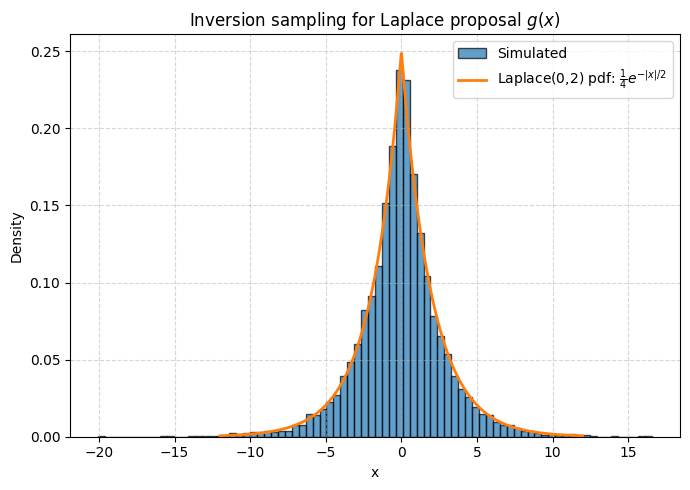

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def laplace_inversion_rvs(size=1, rng=None):
    """
    Inversion sampling for Laplace(μ=0, b=2), pdf = (1/4) * exp(-|x|/2).
    """
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(size=size)
    X = np.empty_like(U)
    left = U < 0.5
    X[left]  =  2.0 * np.log(2.0 * U[left])              # 2 ln(2U)
    X[~left] = -2.0 * np.log(2.0 * (1.0 - U[~left]))     # -2 ln(2(1-U))
    return X

# quick visual sanity check
rng = np.random.default_rng(123)
n = 10000
xs = laplace_inversion_rvs(n, rng)

grid = np.linspace(-12, 12, 1000)
pdf  = 0.25 * np.exp(-np.abs(grid) / 2.0)

plt.figure(figsize=(7,5))
plt.hist(xs, bins=80, density=True, alpha=0.7, edgecolor="black", label="Simulated")
# Use \frac (supported) instead of \tfrac (unsupported)
plt.plot(grid, pdf, lw=2, label=r"Laplace(0,2) pdf: $\frac{1}{4} e^{-|x|/2}$")
plt.title("Inversion sampling for Laplace proposal $g(x)$")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.
We want to generate $X \sim \mathcal{N}(0,1)$ with density
$
f(x) \;=\; \frac{1}{\sqrt{2\pi}} e^{-x^{2}/2},
$
using the proposal
$
g(x) \;=\; e^{-|x|/2}, \qquad x \in \mathbb{R}.
$

To determine the smallest $k$:  
We require $k g(x) \ge f(x)$ for all $x\in\mathbb{R}$, i.e.
$
k \;\ge\; \sup_{x\in\mathbb{R}} \frac{f(x)}{g(x)}.
$
Compute
$
\frac{f(x)}{g(x)}
= \frac{1}{\sqrt{2\pi}}
\exp\!\left(-\frac{x^{2}}{2} + \frac{|x|}{2}\right).
$

Because the function is even, we just consider $x \ge 0$. Define
$
h(x) = -\tfrac{1}{2}(x^{2}-x).
$
Maximizing $h(x)$ is equivalent to minimizing $x^{2}-x$.  
Differentiate: $d(x^{2}-x)/dx = 2x-1=0 \;\;\Rightarrow\;\; x^{\star}=1/2$.  
At this point,
$
x^{2}-x = \tfrac{1}{4}-\tfrac{1}{2} = -\tfrac{1}{4}.
$

Hence the supremum is attained at $x=1/2$ and
$
\sup_{x\in\mathbb{R}}\frac{f(x)}{g(x)}
= \frac{1}{\sqrt{2\pi}} \exp\!\left(-\frac{-1/4}{2}\right)
= \frac{e^{1/8}}{\sqrt{2\pi}}.
$

Therefore the smallest admissible constant is
$
\boxed{k \;=\; \frac{e^{1/8}}{\sqrt{2\pi}} \;\approx\; 0.452.}
$

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Accepted samples           : 1000
Proposals (attempts)       : 1788
Total U(0,1) draws         : 3576
Avg uniforms per sample    : 3.576
Acceptance rate            : 0.559 (95% CI: 0.536, 0.582)
Uniforms/sample (theory 2/p): 3.576 (95% CI: 3.435, 3.729)


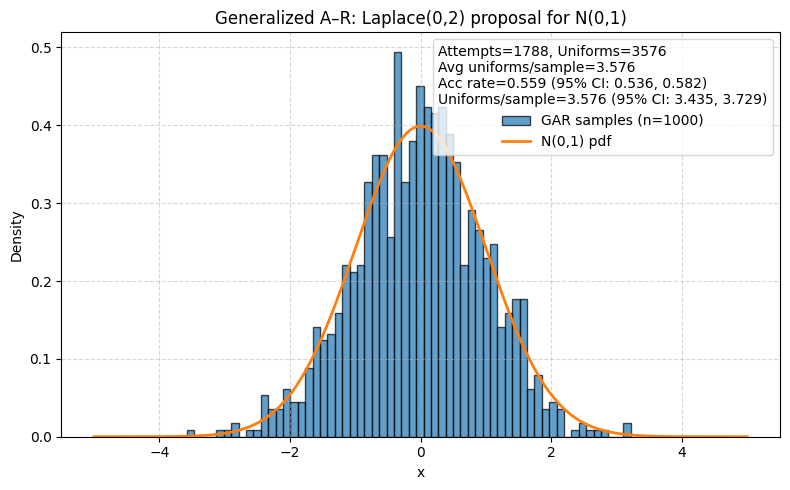

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Target and proposal helpers ----
def f_norm(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2*np.pi)

# unnormalized proposal g(x) = exp(-|x|/2)
def g_unnorm(x):
    return np.exp(-0.5 * np.abs(x))

# minimal envelope constant k = e^{1/8}/sqrt(2π)
k = np.exp(1/8) / np.sqrt(2*np.pi)
G_int = 4.0  # ∫ g(x) dx for g(x)=exp(-|x|/2)

def laplace02_rvs(size=1, rng=None):
    """Inversion for Laplace(0,2) with pdf (1/4)exp(-|x|/2)."""
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(size=size)
    X = np.empty_like(U)
    mask = (U < 0.5)
    X[mask]  =  2.0 * np.log(2.0 * U[mask])
    X[~mask] = -2.0 * np.log(2.0 * (1.0 - U[~mask]))
    return X

def gar_normal_rvs(n, rng=None):
    """
    Generalized A–R for N(0,1) using proposal proportional to g(x)=exp(-|x|/2).
    Propose Y ~ Laplace(0,2); accept with prob a(Y)=f(Y)/(k*g_unnorm(Y)).
    Returns samples, attempts (number of proposals), acceptance_rate.
    """
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n, dtype=float)
    i = 0
    attempts = 0
    while i < n:
        y = laplace02_rvs(1, rng=rng)[0]   # uses 1 uniform
        v = rng.random()                   # accept/reject uniform
        a = f_norm(y) / (k * g_unnorm(y))
        attempts += 1
        if v <= a:
            out[i] = y
            i += 1
    return out, attempts, (n / attempts)

# ---- Generate 1000 samples & compute CI for uniforms needed ----
rng = np.random.default_rng(123)
n_accept = 1000
xs, attempts, acc_rate = gar_normal_rvs(n_accept, rng=rng)

# Uniform draws used: 2 per proposal (one for inversion, one for accept/reject)
total_uniforms = 2 * attempts
avg_uniforms_per_sample = total_uniforms / n_accept

# 95% CI for acceptance probability p via Wald; then transform to uniforms/sample = 2/p
z = 1.96
p_hat = acc_rate
se_p = np.sqrt(p_hat * (1 - p_hat) / attempts)
p_low = max(0.0, p_hat - z * se_p)
p_high = min(1.0, p_hat + z * se_p)

# Transform CI: uniforms per accepted sample m = 2 / p
eps = 1e-12
m_hat = 2.0 / p_hat
m_low = 2.0 / max(p_high, eps)
m_high = 2.0 / max(p_low, eps)

print(f"Accepted samples           : {n_accept}")
print(f"Proposals (attempts)       : {attempts}")
print(f"Total U(0,1) draws         : {total_uniforms}")
print(f"Avg uniforms per sample    : {avg_uniforms_per_sample:.3f}")
print(f"Acceptance rate            : {p_hat:.3f} (95% CI: {p_low:.3f}, {p_high:.3f})")
print(f"Uniforms/sample (theory 2/p): {m_hat:.3f} "
      f"(95% CI: {m_low:.3f}, {m_high:.3f})")

# ---- Plot histogram vs true pdf ----
grid = np.linspace(-5, 5, 800)
plt.figure(figsize=(8,5))
plt.hist(xs, bins=60, density=True, alpha=0.7, edgecolor='black', label=f"GAR samples (n={n_accept})")
plt.plot(grid, f_norm(grid), lw=2, label="N(0,1) pdf")

leg_title = (f"Attempts={attempts}, Uniforms={total_uniforms}\n"
             f"Avg uniforms/sample={avg_uniforms_per_sample:.3f}\n"
             f"Acc rate={p_hat:.3f} (95% CI: {p_low:.3f}, {p_high:.3f})\n"
             f"Uniforms/sample={m_hat:.3f} (95% CI: {m_low:.3f}, {m_high:.3f})")
plt.legend(title=leg_title)
plt.title("Generalized A–R: Laplace(0,2) proposal for N(0,1)")
plt.xlabel("x"); plt.ylabel("Density")
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout(); plt.show()

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

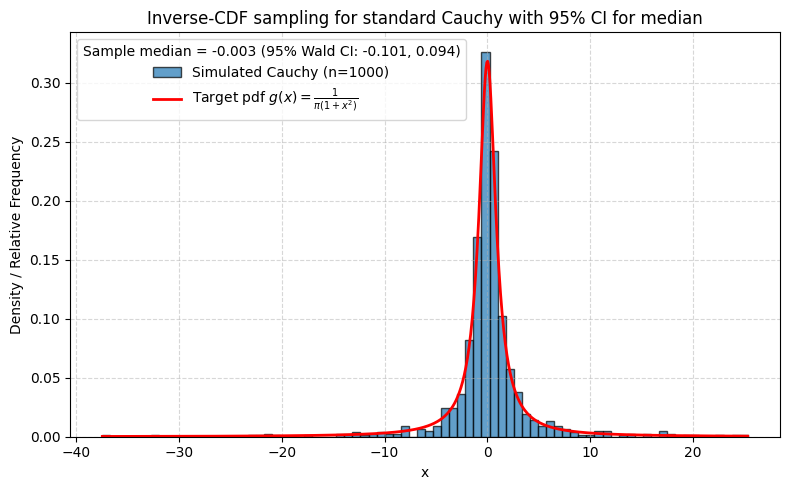

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def cauchy_inverse_rvs(size=1, rng=None, eps=1e-12):
    """
    Inverse-CDF sampling for standard Cauchy(0,1):
        X = tan(pi*(U - 1/2)), U ~ Uniform(0,1).
    'eps' keeps U away from endpoints to avoid +/- inf during plotting.
    """
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(size=size)
    U = np.clip(U, eps, 1.0 - eps)
    return np.tan(np.pi * (U - 0.5))

def cauchy_pdf(x):
    return 1.0 / (np.pi * (1.0 + x**2))

# --- generate samples ---
rng = np.random.default_rng(123)
n = 1000
xs = cauchy_inverse_rvs(n, rng=rng)

# --- 95% Wald CI for the median (location) ---
med = np.median(xs)
se_med = np.pi / (2.0 * np.sqrt(n))     # asymptotic SE of sample median for Cauchy(0,1)
z = 1.96
ci_low = med - z * se_med
ci_high = med + z * se_med

# --- plot histogram vs target pdf ---
# pick a central window for visibility (Cauchy is heavy-tailed)
lo, hi = np.percentile(xs, [1, 99])
grid = np.linspace(lo, hi, 800)

plt.figure(figsize=(8,5))
plt.hist(xs, bins=80, range=(lo, hi), density=True, alpha=0.7,
         edgecolor='black', label=f"Simulated Cauchy (n={n})")
plt.plot(grid, cauchy_pdf(grid), 'r-', lw=2,
         label=r"Target pdf $g(x)=\frac{1}{\pi(1+x^2)}$")

legend_title = (f"Sample median = {med:.3f} "
                f"(95% Wald CI: {ci_low:.3f}, {ci_high:.3f})")
plt.legend(title=legend_title)
plt.title("Inverse-CDF sampling for standard Cauchy with 95% CI for median")
plt.xlabel("x")
plt.ylabel("Density / Relative Frequency")
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.
$
f(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2},\qquad
g(x)=\frac{1}{\pi(1+x^2)}.
$
We need the smallest constant $k$ such that $k\,g(x)\ge f(x)$ for all $x\in\mathbb{R}$:
$
k \;\ge\; \sup_x \frac{f(x)}{g(x)}
= \sup_x \frac{1}{\sqrt{2\pi}}e^{-x^2/2}\,\pi(1+x^2)
= \frac{\pi}{\sqrt{2\pi}}\;\sup_x \bigl(1+x^2\bigr)e^{-x^2/2}.
$


Define $h(x)=(1+x^2)e^{-x^2/2}$.
Since $h$ is even, maximize on $x\ge0$:
$
h'(x)=e^{-x^2/2}\,x\,(1-x^2).
$
Critical points at $x=0$ and $x=1$. We have $h(0)=1$ and $h(1)=2e^{-1/2}$, so
$\max h=2e^{-1/2}$ at $x=\pm1$. Hence
$
\boxed{\,k=\frac{\pi}{\sqrt{2\pi}}\cdot 2e^{-1/2}
= \sqrt{2\pi}\,e^{-1/2}\approx 1.520\,}.
$

Since $g$ is a pdf, accept a proposal $Y\sim g$ with probability
$
a(Y)=\frac{f(Y)}{k\,g(Y)}\in[0,1].
$
The acceptance probability is $\Pr(\text{accept})=1/k\approx 0.658$, so the expected
number of proposals per accepted sample is
$
\boxed{\,\mathbb{E}[\#\text{proposals}] = k \approx 1.520\,}.
$
If each proposal uses one uniform for inversion and one for accept/reject, the expected
number of uniforms per accepted sample is $2k\approx 3.04$.

Accepted samples                 : 1000
Proposals (attempts)             : 1538
Total U(0,1) draws               : 3076
Avg uniforms per sample          : 3.076
Acceptance rate                  : 0.650 (95% CI: 0.626, 0.674)
Uniforms/sample (2/p)            : 3.076 (95% CI: 2.967, 3.193)
Theoretical accept = 0.658, uniforms/sample ≈ 3.041


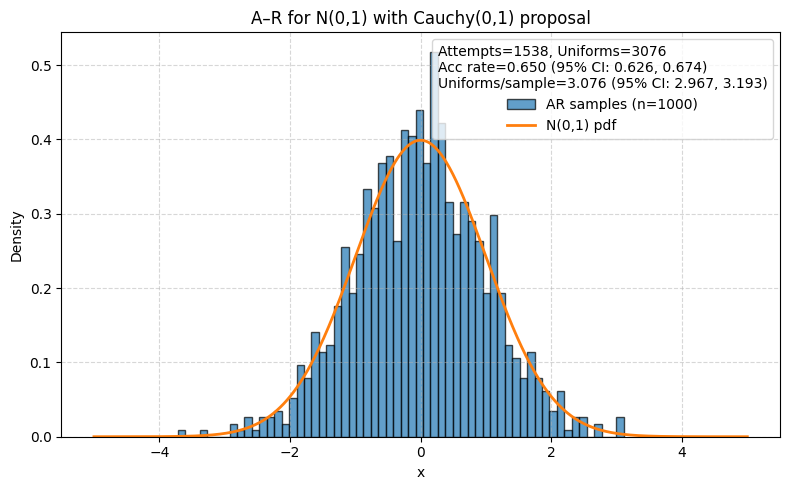

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ---- target N(0,1) and Cauchy(0,1) helpers ----
def f_norm(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2*np.pi)

def cauchy_pdf(x):
    return 1.0 / (np.pi * (1.0 + x**2))

def cauchy_inverse_rvs(size=1, rng=None, eps=1e-12):
    """
    Inversion for standard Cauchy(0,1): X = tan(pi*(U-1/2)), U~U(0,1).
    'eps' avoids +/-inf from exact endpoints when plotting.
    """
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(size=size)
    U = np.clip(U, eps, 1.0 - eps)
    return np.tan(np.pi * (U - 0.5))

# Minimal envelope constant for this pair (derived above)
k = np.sqrt(2*np.pi) * np.exp(-0.5)        # ≈ 1.520346
theory_accept = 1.0 / k                    # ≈ 0.6579
theory_uniforms_per_sample = 2.0 * k       # ≈ 3.0407

def ar_normal_with_cauchy(n, rng=None):
    """
    Acceptance–Rejection for N(0,1) using Cauchy(0,1) proposal.
    Proposal Y ~ Cauchy(0,1) via inversion; accept with prob f(Y)/(k*g(Y)).
    Returns samples, attempts, acceptance_rate.
    """
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n, dtype=float)
    i = 0
    attempts = 0
    while i < n:
        y = cauchy_inverse_rvs(1, rng=rng)[0]     # 1 uniform (inversion)
        u = rng.random()                           # 1 uniform (accept/reject)
        a = f_norm(y) / (k * cauchy_pdf(y))        # acceptance probability
        attempts += 1
        if u <= a:
            out[i] = y
            i += 1
    return out, attempts, (n / attempts)

# ---- run: 1000 samples ----
rng = np.random.default_rng(123)
n_accept = 1000
xs, attempts, acc_rate = ar_normal_with_cauchy(n_accept, rng=rng)

# Uniforms used: 2 per proposal (one for inversion, one for accept/reject)
total_uniforms = 2 * attempts
avg_uniforms_per_sample = total_uniforms / n_accept

# 95% Wald CI for acceptance rate p with attempts trials
z = 1.96
p_hat = acc_rate
se_p = np.sqrt(p_hat * (1 - p_hat) / attempts)
p_low = max(0.0, p_hat - z * se_p)
p_high = min(1.0, p_hat + z * se_p)

# Transform to "uniforms per sample" m = 2/p; invert interval endpoints
eps = 1e-12
m_hat  = 2.0 / p_hat
m_low  = 2.0 / max(p_high, eps)
m_high = 2.0 / max(p_low,  eps)

print(f"Accepted samples                 : {n_accept}")
print(f"Proposals (attempts)             : {attempts}")
print(f"Total U(0,1) draws               : {total_uniforms}")
print(f"Avg uniforms per sample          : {avg_uniforms_per_sample:.3f}")
print(f"Acceptance rate                  : {p_hat:.3f} (95% CI: {p_low:.3f}, {p_high:.3f})")
print(f"Uniforms/sample (2/p)            : {m_hat:.3f} (95% CI: {m_low:.3f}, {m_high:.3f})")
print(f"Theoretical accept = {theory_accept:.3f}, uniforms/sample ≈ {theory_uniforms_per_sample:.3f}")


# ---- histogram vs true normal pdf ----
# choose a central window for visibility (heavy tails from proposals don't matter here)
grid = np.linspace(-5, 5, 800)
plt.figure(figsize=(8,5))
plt.hist(xs, bins=60, density=True, alpha=0.7, edgecolor='black',
         label=f"AR samples (n={n_accept})")
plt.plot(grid, f_norm(grid), lw=2, label="N(0,1) pdf")
leg_title = (f"Attempts={attempts}, Uniforms={total_uniforms}\n"
             f"Acc rate={p_hat:.3f} (95% CI: {p_low:.3f}, {p_high:.3f})\n"
             f"Uniforms/sample={m_hat:.3f} (95% CI: {m_low:.3f}, {m_high:.3f})")
plt.legend(title=leg_title)
plt.title("A–R for N(0,1) with Cauchy(0,1) proposal")
plt.xlabel("x"); plt.ylabel("Density")
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout(); plt.show()